Data Desription   https://rdrr.io/cran/ISLR/man/Hitters.html

# Salary Prediction

In [1]:
import pandas as pd
data = pd.read_csv('E:\\Python\\Bigdata leader\\Hitters PCR\\Hitters.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

##### 'Salary' has 59 null values.
##### Let's drop them.

In [3]:
data = data.drop(data[data.Salary.isnull()].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

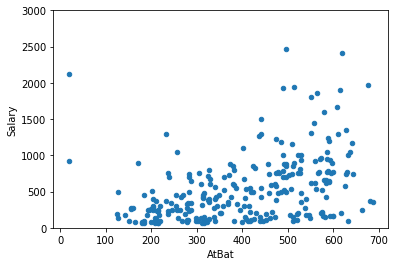

In [4]:
import seaborn as sns

#scatter plot AtBat/Salary
var = 'AtBat'
SalAtBScatter = pd.concat([data['Salary'], data[var]], axis=1)
SalAtBScatter.plot.scatter(x=var, y='Salary', ylim=(0,3000));

In [5]:
data[data.AtBat<50]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.000,A


### Two outliers are on the left side.
커리어 전체 타석 수(CAtBat), 연차(Years)가 너무 적은 데 비해 고연봉.<br>
PutOuts, Assists 등의 수비 관련 기록만 비정상적으로 높음.<br>
투수가 타석에 서는 경우 등으로 보임.
##### Get them out of the data.

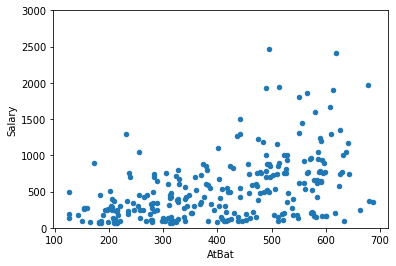

In [6]:
## kill outliers
data = data.drop(data[data.AtBat<50].index)

# update scatter plot AtBat/Salary 
var = 'AtBat'
SalAtBScatter = pd.concat([data['Salary'], data[var]], axis=1)
SalAtBScatter.plot.scatter(x=var, y='Salary', ylim=(0,3000));

In [7]:
len(data)

261

타석 수가 많을수록 연봉 높을 확률 up

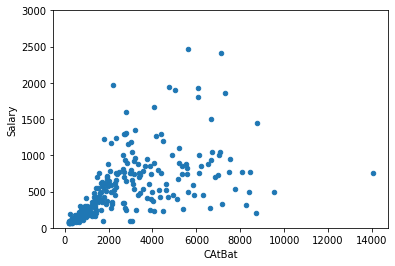

In [8]:
# scatter plot CAtBat/Salary 
var = 'CAtBat'
SalCAtBScatter = pd.concat([data['Salary'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='Salary', ylim=(0,3000));

In [9]:
data[data['CAtBat']>12000]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.0,N


This might be a veteran player who's going through aging curve.

### Check if we need Dummy Variables or not

League

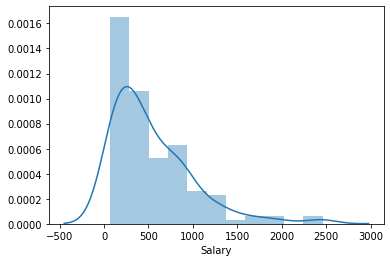

In [10]:
data_A = data.loc[data['League']=='A']
sns.distplot(data_A['Salary'])

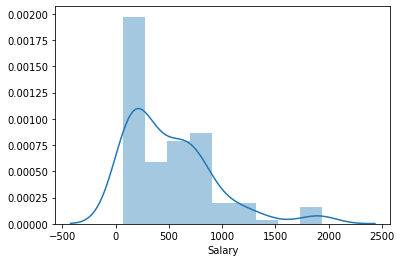

In [11]:
data_N = data.loc[data['League']=='N']
sns.distplot(data_N['Salary'])

Division

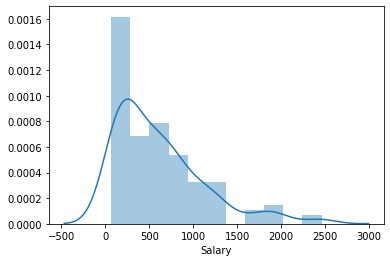

In [12]:
data_E = data.loc[data['Division']=='E']
sns.distplot(data_E['Salary'])

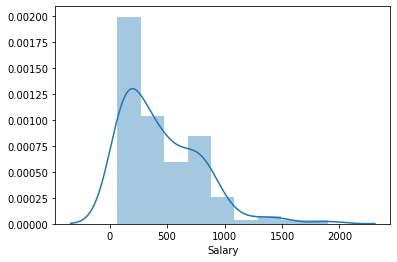

In [13]:
data_W = data.loc[data['Division']=='W']
sns.distplot(data_W['Salary'])

##### 각 League, Division 간의 연봉 분포 차이 크지 않음. --> Let's drop 'League', 'Division' features.

In [14]:
len(data[data.NewLeague!=data.League])

17

##### 'League' 와 'NewLeague' 17개 데이터 제외하고 모두 동일  --> Drop 'NewLeague'.

In [15]:
data = data.drop(['League', 'Division', 'NewLeague'],axis=1)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


##### Make a new variable named 'OBP' which stands for 'On Base Percentage'.
##### OBP = (Hits+Walks)/(AtBat+Walks)
##### COBP = (CHits+CWalks)/(CAtBat+CWalks)

In [16]:
data['OBP']=(data['Hits']+data['Walks'])/(data['AtBat']+data['Walks'])
data['COBP']=(data['CHits']+data['CWalks'])/(data['CAtBat']+data['CWalks'])

In [17]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,OBP,COBP
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0.338983,0.316423
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0.371171,0.381558
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0.333959,0.322467
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0.333333,0.312354
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0.324324,0.288353


### Stats over career<br>
한 선수가 전체 경력동안 쌓은 기록 관련 Features<br>

In [18]:
CAtFeat = data[['Salary','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','COBP']]
CAtFeat.corr()

,Salary,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,COBP
Salary,1.000000,0.433522,0.562635,0.585125,0.554353,0.598725,0.601539,0.521419,0.487857
Years,0.433522,1.000000,0.914816,0.896858,0.720670,0.875489,0.862694,0.836244,0.300707
CAtBat,0.562635,0.914816,1.000000,0.995016,0.800551,0.982600,0.950364,0.906006,0.388975
CHits,0.585125,0.896858,0.995016,1.000000,0.785388,0.984401,0.946374,0.889862,0.419369
CHmRun,0.554353,0.720670,0.800551,0.785388,1.000000,0.824633,0.927560,0.809774,0.371001
CRuns,0.598725,0.875489,0.982600,0.984401,0.824633,1.000000,0.945239,0.927217,0.455772
CRBI,0.601539,0.862694,0.950364,0.946374,0.927560,0.945239,1.000000,0.888296,0.414737
CWalks,0.521419,0.836244,0.906006,0.889862,0.809774,0.927217,0.888296,1.000000,0.521287
COBP,0.487857,0.300707,0.388975,0.419369,0.371001,0.455772,0.414737,0.521287,1.000000


통산 타석 수 'CAtBat'와 연차 'Years'의 다른 변수들과의 상관관계 비교.<br>
'CAtBat'의 모든 상관계수가 'Years'보다 높음.<br>
'CAtBat'와 'Years'는 거의 같은 의미를 가진 변수들이면서, 'CAtBat'가 'Salary'에 더 높은 상관관계를 보임.<br>
##### Let's drop 'Years'.

In [19]:
data = data.drop(['Years'],axis=1)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,OBP,COBP
1,315,81,7,24,38,39,3449,835,69,321,414,375,632,43,10,475.0,0.338983,0.316423
2,479,130,18,66,72,76,1624,457,63,224,266,263,880,82,14,480.0,0.371171,0.381558
3,496,141,20,65,78,37,5628,1575,225,828,838,354,200,11,3,500.0,0.333959,0.322467
4,321,87,10,39,42,30,396,101,12,48,46,33,805,40,4,91.5,0.333333,0.312354
5,594,169,4,74,51,35,4408,1133,19,501,336,194,282,421,25,750.0,0.324324,0.288353


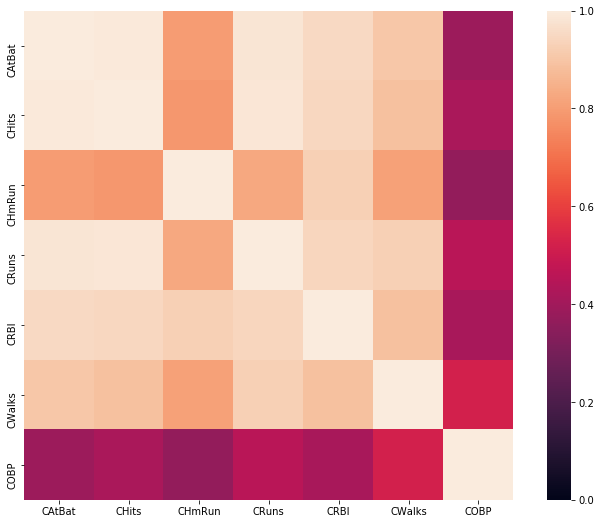

In [20]:
from matplotlib import pyplot as plt

CAtFeat = data[['CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','COBP']]
corrmat = CAtFeat.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=0, square=True);

#### 전체적으로 높은 상관계수 (Salary 제외)<br>
당연하게도 통산 타석 수 'CAtBat'에 비례하여 더 많은 기록이 쌓임.

### Stats in 1986

In [21]:
AtBatFeat = data[['Salary','AtBat','Hits','HmRun','Runs','RBI','Walks','OBP']]
AtBatFeat.corr()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,OBP
Salary,1.000000,0.462439,0.501517,0.376937,0.475851,0.502522,0.494795,0.394051
AtBat,0.462439,1.000000,0.962510,0.547466,0.896374,0.789312,0.611196,0.234807
Hits,0.501517,0.962510,1.000000,0.522058,0.907319,0.781402,0.573479,0.394352
HmRun,0.376937,0.547466,0.522058,1.000000,0.625076,0.847686,0.430659,0.222823
Runs,0.475851,0.896374,0.907319,0.625076,1.000000,0.771642,0.687710,0.434252
RBI,0.502522,0.789312,0.781402,0.847686,0.771642,1.000000,0.557210,0.322602
Walks,0.494795,0.611196,0.573479,0.430659,0.687710,0.557210,1.000000,0.639221
OBP,0.394051,0.234807,0.394352,0.222823,0.434252,0.322602,0.639221,1.000000


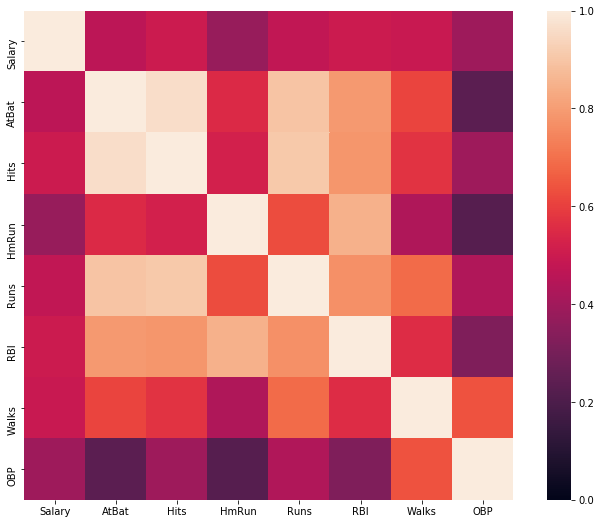

In [22]:
corrmat = AtBatFeat.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=0, square=True);

'OBP'와 'COBP'의 'Salary'와 상관관계가 다른 변수들의 'Salary'와의 상관관계보다 낮음.<br>
##### Drop 'OBP' and 'COBP'.

In [23]:
data = data.drop(['OBP','COBP'],axis=1)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,4408,1133,19,501,336,194,282,421,25,750.0


### Defensive statistics (PutOuts, Assists, Errors)

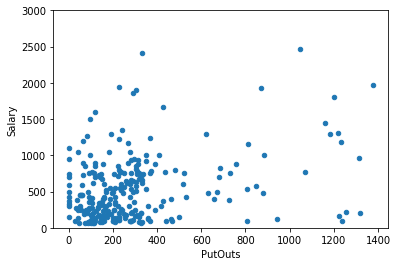

In [24]:
# scatter plot PutOuts/Salary 
var = 'Salary'
SalCAtBScatter = pd.concat([data['PutOuts'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(y=var, x='PutOuts', ylim=(0,3000));

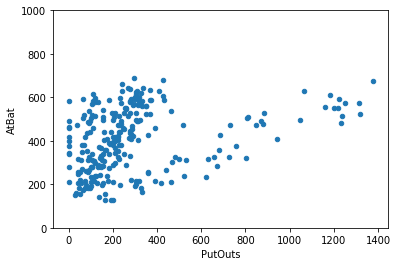

In [25]:
# scatter plot PutOuts/AtBat 
var = 'PutOuts'
SalCAtBScatter = pd.concat([data['AtBat'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='AtBat', ylim=(0,1000));

There seems to be two linear lines in this plot.<br>
각각 line이 Outfielder 와 Infielder를 가리키는 것으로 보임.<br>
Each line shows linearity with 'AtBat'.<br>
굳이  Outfielder, Infielder로 나누지 않고, 'PutOuts' 자체를 drop해도 예측에 영향 없을 것으로 판단.
##### Let's drop 'PutOuts'

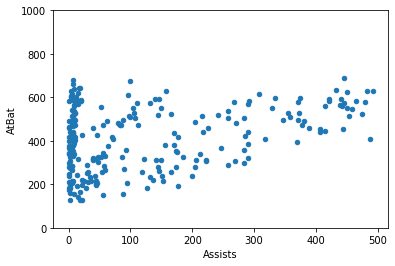

In [26]:
# scatter plot Assists/AtBat
var = 'Assists'
SalCAtBScatter = pd.concat([data['AtBat'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='AtBat', ylim=(0,1000));

In [27]:
len(data[data['Assists']<20])

108

전체 261개 데이터 중, 약 40%를 넘는 108개 데이터의 Assists 값이 20 미만.<br>
Atbat이 증가하면서 Assists도 증가하는 경향 약하게 보임.

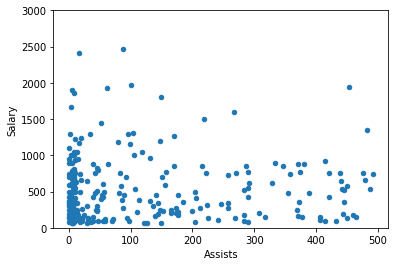

In [28]:
# scatter plot Assists/Salary
var = 'Assists'
SalCAtBScatter = pd.concat([data['Salary'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='Salary', ylim=(0,3000));

Assists 와 Salary 간의 상관관계 거의 없어보임.
##### Let's drop 'Assists'.

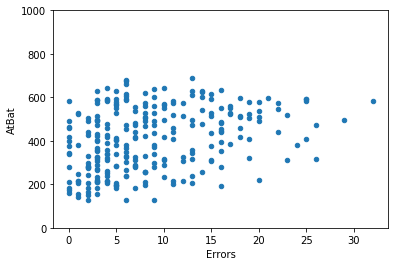

In [29]:
# scatter plot Errors/AtBat
var = 'Errors'
SalCAtBScatter = pd.concat([data['AtBat'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='AtBat', ylim=(0,1000));

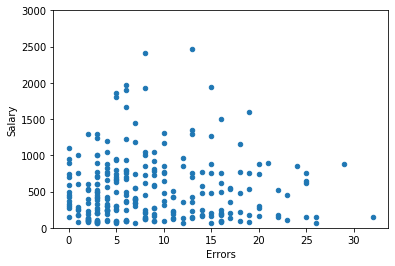

In [30]:
# scatter plot Errors/Salary 
var = 'Errors'
SalCAtBScatter = pd.concat([data['Salary'], data[var]], axis=1)
SalCAtBScatter.plot.scatter(x=var, y='Salary', ylim=(0,3000));

Errors가 증가하면, Salary가 감소하는 경향이 희미하게 보임.

In [31]:
data = data.drop(['PutOuts','Assists'], axis=1)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Errors,Salary
1,315,81,7,24,38,39,3449,835,69,321,414,375,10,475.0
2,479,130,18,66,72,76,1624,457,63,224,266,263,14,480.0
3,496,141,20,65,78,37,5628,1575,225,828,838,354,3,500.0
4,321,87,10,39,42,30,396,101,12,48,46,33,4,91.5
5,594,169,4,74,51,35,4408,1133,19,501,336,194,25,750.0


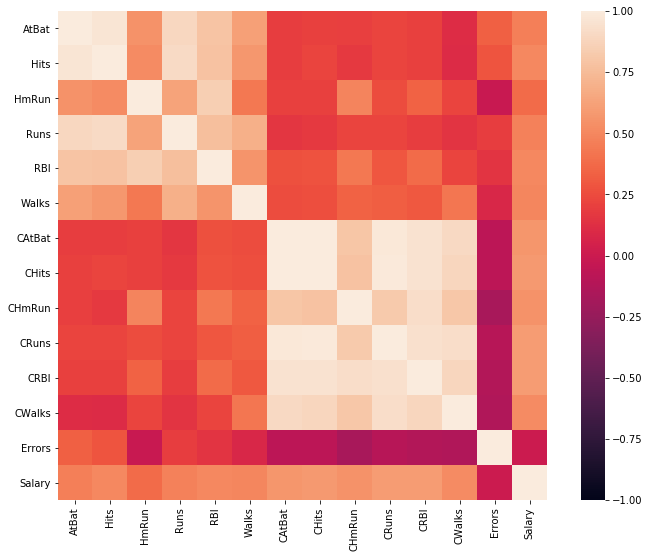

In [32]:
data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), vmax=1, vmin=-1, square=True);

# Modeling

In [33]:
x = data.drop('Salary',axis=1)
y = data.Salary

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

pca = PCA()
rbscaler = RobustScaler()
x_pca = pca.fit_transform(rbscaler.fit_transform(x))

In [39]:
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.116461,1.063884,0.258656,0.095311,-0.331494,0.081298,-0.289668,0.247767,0.158824,-0.214829,-0.036798,0.086687,-0.017098
1,-0.139968,-1.253121,0.034125,-0.123459,-0.862253,0.114793,-0.307275,0.004945,0.048743,-0.094129,0.060943,-0.030291,0.009598
2,3.065091,-0.138997,-0.823407,0.597077,0.747891,-0.557341,-0.115293,-0.242961,0.073490,0.162566,0.146798,0.014116,-0.050438
3,-2.061443,0.249973,-0.569676,-0.118556,0.081444,0.012538,-0.063292,0.082848,0.038351,-0.002544,0.062763,-0.022061,-0.002353
4,0.112659,-0.863045,2.104526,0.607119,0.485190,-0.136745,0.057590,-0.126400,0.055460,0.003502,0.000200,0.134634,-0.060676


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()

x_rb = rbscaler.fit_transform(x)